In [ ]:
import os
import os.path
import time
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content'

In [ ]:
data_path = '/content/drive/My Drive'


In [ ]:
meta = pd.read_csv(os.path.join(data_path, 'meta.csv'))

# Data Cleaning

In [ ]:
meta.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14
0,1/2/14,54.830002,55.220001,54.189999,54.709999,43195500,51.917475,58.077822,-64.312117,-13.517101,50.2818,50.740946,47.6654,46.914555,1.828901,53.2450,1.030002,1.652052,1.710739
1,1/3/14,55.020000,55.650002,54.529999,54.560001,38246200,50.604988,57.387622,-40.054734,-17.361247,50.3194,50.890719,47.8288,47.066897,1.687987,53.5420,1.120003,1.576045,1.668543
2,1/6/14,54.419998,57.259998,54.049999,57.200001,68852600,67.483917,65.221525,43.907749,42.364730,50.4254,51.138151,48.0306,47.268784,1.768947,53.9850,3.209999,1.809467,1.778647
3,1/7/14,57.700001,58.549999,57.220001,57.919998,77207400,70.672584,67.003189,150.620136,117.886980,50.5348,51.404115,48.2433,47.480966,1.869653,54.4840,1.349998,1.743829,1.748030
4,1/8/14,57.599998,58.410000,57.230000,58.230000,56682400,72.049420,67.768804,107.795942,101.415192,50.6604,51.671806,48.4600,47.695073,1.951977,54.9535,1.180000,1.663282,1.707456


#### Drop the date column because that data won't help our model.

In [ ]:
meta = meta.drop(columns=['date'])

#### We want to decide which days to buy stock. We want to buy stock only if the next day's close will be higher than the current day's close. Let's create a 'tomorrow' column representing the next day's close and our 'target' column will be whether the next day's close beats today's close.

In [ ]:
meta["tomorrow"] = meta["close"].shift(-1)

In [ ]:
meta

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,tomorrow
0,54.830002,55.220001,54.189999,54.709999,43195500,51.917475,58.077822,-64.312117,-13.517101,50.2818,50.740946,47.6654,46.914555,1.828901,53.245000,1.030002,1.652052,1.710739,54.560001
1,55.020000,55.650002,54.529999,54.560001,38246200,50.604988,57.387622,-40.054734,-17.361247,50.3194,50.890719,47.8288,47.066897,1.687987,53.542000,1.120003,1.576045,1.668543,57.200001
2,54.419998,57.259998,54.049999,57.200001,68852600,67.483917,65.221525,43.907749,42.364730,50.4254,51.138151,48.0306,47.268784,1.768947,53.985000,3.209999,1.809467,1.778647,57.919998
3,57.700001,58.549999,57.220001,57.919998,77207400,70.672584,67.003189,150.620136,117.886980,50.5348,51.404115,48.2433,47.480966,1.869653,54.484000,1.349998,1.743829,1.748030,58.230000
4,57.599998,58.410000,57.230000,58.230000,56682400,72.049420,67.768804,107.795942,101.415192,50.6604,51.671806,48.4600,47.695073,1.951977,54.953500,1.180000,1.663282,1.707456,57.220001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,355.579987,357.200012,351.220001,353.390015,11764200,75.599633,67.333880,76.743391,118.091091,325.3110,327.435849,313.7337,312.872285,6.988186,334.351501,5.980011,8.002103,8.111983,354.829987
2512,354.989990,356.980011,353.450012,354.829987,9898600,77.018164,68.186993,77.588047,103.323614,326.1138,328.510129,314.1501,313.703131,7.482646,335.358000,3.589996,7.371802,7.788984,357.829987
2513,356.070007,359.000000,355.309998,357.829987,13207900,79.863540,69.947896,105.699338,100.793824,326.8474,329.659928,314.6211,314.576930,8.024088,336.300000,4.170013,6.914403,7.530486,358.320007
2514,359.700012,361.899994,357.809998,358.320007,11798800,80.327681,70.237681,130.191423,99.110535,327.5338,330.783852,315.0387,315.443129,8.395942,337.606000,4.089996,6.510917,7.284737,353.959991


In [ ]:
meta["target"] = (meta["tomorrow"] > meta["close"]).astype(int)

In [ ]:
meta

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,tomorrow,target
0,54.830002,55.220001,54.189999,54.709999,43195500,51.917475,58.077822,-64.312117,-13.517101,50.2818,50.740946,47.6654,46.914555,1.828901,53.245000,1.030002,1.652052,1.710739,54.560001,0
1,55.020000,55.650002,54.529999,54.560001,38246200,50.604988,57.387622,-40.054734,-17.361247,50.3194,50.890719,47.8288,47.066897,1.687987,53.542000,1.120003,1.576045,1.668543,57.200001,1
2,54.419998,57.259998,54.049999,57.200001,68852600,67.483917,65.221525,43.907749,42.364730,50.4254,51.138151,48.0306,47.268784,1.768947,53.985000,3.209999,1.809467,1.778647,57.919998,1
3,57.700001,58.549999,57.220001,57.919998,77207400,70.672584,67.003189,150.620136,117.886980,50.5348,51.404115,48.2433,47.480966,1.869653,54.484000,1.349998,1.743829,1.748030,58.230000,1
4,57.599998,58.410000,57.230000,58.230000,56682400,72.049420,67.768804,107.795942,101.415192,50.6604,51.671806,48.4600,47.695073,1.951977,54.953500,1.180000,1.663282,1.707456,57.220001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,355.579987,357.200012,351.220001,353.390015,11764200,75.599633,67.333880,76.743391,118.091091,325.3110,327.435849,313.7337,312.872285,6.988186,334.351501,5.980011,8.002103,8.111983,354.829987,1
2512,354.989990,356.980011,353.450012,354.829987,9898600,77.018164,68.186993,77.588047,103.323614,326.1138,328.510129,314.1501,313.703131,7.482646,335.358000,3.589996,7.371802,7.788984,357.829987,1
2513,356.070007,359.000000,355.309998,357.829987,13207900,79.863540,69.947896,105.699338,100.793824,326.8474,329.659928,314.6211,314.576930,8.024088,336.300000,4.170013,6.914403,7.530486,358.320007,1
2514,359.700012,361.899994,357.809998,358.320007,11798800,80.327681,70.237681,130.191423,99.110535,327.5338,330.783852,315.0387,315.443129,8.395942,337.606000,4.089996,6.510917,7.284737,353.959991,0


# Basic Model

#### Let's first create a very simple model. This won't have neural networks or anything too advanced. We just want to see if we can get an accurate read from this data using something simple.

#### The test set will be the last 250 days of data (approximately one year of data). We'll use the rest of the data to create the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = meta.iloc[:-250]
test = meta.iloc[-250:]

predictors = ["close","volume","open","high","low"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [ ]:
preds = pd.Series(preds, index=test.index)

In [ ]:
precision_score(test["target"], preds)

0.5460526315789473

#### Our precision using the above model is .546, which means we'd be right more than half the time. That's not a bad place to start! Now let's backtest the model and determine where we'd be if we decided to just play the odds.

In [ ]:
combined = pd.concat([test["target"], preds],axis=1)

<Axes: >

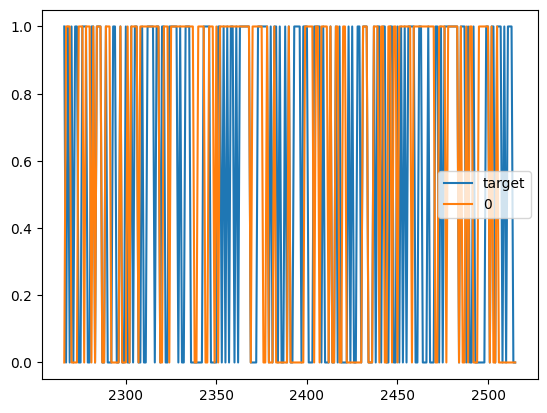

In [ ]:
combined.plot()

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=250, step=250):
        all_predictions = []

        for i in range(start, data.shape[0], step):
            train = data.iloc[0:i].copy()
            test = data.iloc[i:(i+step)].copy()
            predictions = predict(train, test, predictors, model)
            all_predictions.append(predictions)
        return pd.concat(all_predictions)

In [ ]:
predictions = backtest(meta, model, predictors)

In [ ]:
predictions["predictions"].value_counts()

0    1541
1     725
Name: predictions, dtype: int64

In [ ]:
precision_score(predictions["target"], predictions["predictions"])

0.52

In [ ]:
predictions["target"].value_counts() / predictions.shape[0]

1    0.524272
0    0.475728
Name: target, dtype: float64

#### It looks like we'd be better off just buying stock every day than if we used the backtest model since we'd be correct 52.4% of the time just buying stock than if we used the model which is correct 52% of the time.

# Intervals Model

#### It might be becoming too well trained on the training data since we don't have enough variables, so let's create some. Let's define the close ratio for different intervals from each data point. This should add some clarifying information, so the model can improve without overfitting too quickly.

In [ ]:
horizons = [2, 5, 60, 100, 150, 200, 250]
new_predictors = []

for horizon in horizons:
    rolling_averages = meta.rolling(horizon).mean()

    ratio_column = f"close_ratio_{horizon}"
    meta[ratio_column] = meta["close"] / rolling_averages["close"]

    trend_column = f"trend_{horizon}"
    meta[trend_column] = meta.shift(1).rolling(horizon).sum()["target"]

    new_predictors += [ratio_column, trend_column]

In [ ]:
meta = meta.dropna()

In [ ]:
meta

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,...,close_ratio_60,trend_60,close_ratio_100,trend_100,close_ratio_150,trend_150,close_ratio_200,trend_200,close_ratio_250,trend_250
250,79.849998,80.589996,79.099998,79.220001,14370800,52.190009,55.817714,-90.879423,35.196643,76.695999,...,1.037056,36.0,1.038764,61.0,1.080453,87.0,1.129549,115.0,1.151763,137.0
251,79.540001,79.800003,77.860001,78.019997,19935400,42.551166,50.719762,-159.345309,-11.733628,76.717399,...,1.021244,35.0,1.022364,61.0,1.062716,86.0,1.111739,114.0,1.132771,137.0
252,78.580002,78.930000,77.699997,78.449997,18177500,46.668833,52.397499,-112.486262,-23.039214,76.712599,...,1.026389,36.0,1.027325,61.0,1.067105,87.0,1.117054,115.0,1.137610,137.0
253,77.980003,79.250000,76.860001,77.190002,26452200,37.484140,47.314390,-106.403710,-47.529896,76.688999,...,1.009977,35.0,1.010248,61.0,1.048624,87.0,1.098313,115.0,1.118089,136.0
254,77.230003,77.589996,75.360001,76.150002,27399300,31.512057,43.558276,-135.056085,-99.110059,76.611199,...,0.996317,35.0,0.996326,60.0,1.033253,87.0,1.082829,114.0,1.101881,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,352.980011,356.410004,349.209991,354.089996,15289600,77.595238,68.158914,95.125716,138.135513,324.726400,...,1.098404,34.0,1.130040,51.0,1.165536,82.0,1.255815,109.0,1.379524,135.0
2511,355.579987,357.200012,351.220001,353.390015,11764200,75.599633,67.333880,76.743391,118.091091,325.311000,...,1.093438,33.0,1.126401,51.0,1.160488,82.0,1.249528,109.0,1.371766,134.0
2512,354.989990,356.980011,353.450012,354.829987,9898600,77.018164,68.186993,77.588047,103.323614,326.113800,...,1.094810,34.0,1.129492,52.0,1.162506,82.0,1.250743,110.0,1.372285,135.0
2513,356.070007,359.000000,355.309998,357.829987,13207900,79.863540,69.947896,105.699338,100.793824,326.847400,...,1.101177,34.0,1.137336,53.0,1.169497,83.0,1.257396,110.0,1.378721,136.0


In [ ]:
model = RandomForestClassifier(n_estimators=250, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(meta, model, new_predictors)

In [ ]:
predictions["predictions"].value_counts()

0.0    1419
1.0     596
Name: predictions, dtype: int64

In [ ]:
precision_score(predictions["target"], predictions["predictions"])

0.5385906040268457

#### This was a decent improvement over the backtest model and beats the randomly guessing model. However, the simplest model we created at the beginning is still the most accurate. Let's create a more complex model using hyperparameters and neurons to find a model that can consistently beat our random guessing model.

# Complex Model

#### First, let's drop the unnecessary columns. Then, let's split the data and create a sequential model. We'll just use some basic activation functions and dense layers to get a starting point.

In [ ]:
columns_to_drop = ['tomorrow','rsi_7', 'rsi_14', 'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd', 'bollinger', 'TrueRange', 'atr_7', 'atr_14']
meta.drop(columns=columns_to_drop, inplace=True)

<ipython-input-31-3a2979080b5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta.drop(columns=columns_to_drop, inplace=True)


In [ ]:
X = meta.drop(columns=['target'])
y = meta['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4865 - loss: 0.7543 - val_accuracy: 0.4793 - val_loss: 0.7018
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5364 - loss: 0.6992 - val_accuracy: 0.4821 - val_loss: 0.7064
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5386 - loss: 0.6928 - val_accuracy: 0.5096 - val_loss: 0.6969
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5425 - loss: 0.6938 - val_accuracy: 0.5096 - val_loss: 0.6960
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5146 - loss: 0.6962 - val_accuracy: 0.5096 - val_loss: 0.6994
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5573 - loss: 0.6838 - val_accuracy: 0.5207 - val_loss: 0.6966
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5511 - loss: 0.6834 - val_accuracy: 0.5041 - val_loss: 0.6968
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5507 - loss: 0.6833 - val_accuracy: 0.5014 - val_loss:

In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.5172 - loss: 0.6979
Test Accuracy: 0.5011037588119507


In [ ]:
predictions = model.predict(X_test_scaled)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


#### The test accuracy is just over 50% accurate. This is worse than just playing the odds, so let's try to find better hyperparameters. We'll add some hyperparameter options for keras to choose depending on which ones do the best.

In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential([
        Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
              activation='relu',
              input_shape=(X_train_scaled.shape[1],)),
        Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='my_dir',
                     project_name='stock_prediction',
                     overwrite=True)

In [ ]:
tuner.search(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test))

Trial 30 Complete [00h 00m 04s]
val_accuracy: 0.5320088267326355

Best val_accuracy So Far: 0.567328929901123
Total elapsed time: 00h 01m 10s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"Optimal Hyperparameters: {best_hps}")

Optimal Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7fa33ff25330>


In [ ]:
print("Optimal Hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Optimizer: {best_hps.get('optimizer')}")

Optimal Hyperparameters:
Units: 288
Dropout: 0.4
Optimizer: rmsprop


In [ ]:
final_model = build_model(best_hps)

In [ ]:
history = final_model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test))

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5128 - loss: 0.7103 - val_accuracy: 0.5188 - val_loss: 0.6998
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5279 - loss: 0.7008 - val_accuracy: 0.5364 - val_loss: 0.7063
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5437 - loss: 0.6842 - val_accuracy: 0.5011 - val_loss: 0.7043
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5441 - loss: 0.6946 - val_accuracy: 0.5166 - val_loss: 0.7068
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5592 - loss: 0.6802 - val_accuracy: 0.5077 - val_loss: 0.7159
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5590 - loss: 0.6896 - val_accuracy: 0.5188 - val_loss: 0.7011
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5659 - loss: 0.6774 - val_accuracy: 0.5055 - val_loss: 0.7088
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5588 - loss: 0.6871 - val_accuracy: 0.5121 - val_loss:

In [ ]:
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5147 - loss: 0.7052 


In [ ]:
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.5055187344551086


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
y_pred = final_model.predict(X_test_scaled) >= 0.6

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
print("Precision (Buying Stock):", precision)
print("Recall (Buying Stock):", recall)

Precision (Buying Stock): 0.4942528735632184
Recall (Buying Stock): 0.18777292576419213


#### We determined the best hyperparameters for accuracy, but the precision is very low. Let's try to create a model that focuses on precision. That might be the best thing to focus on since we are fine with missing days that we should have bought stock but we want to be confident that the days we bought stock will turn out positive.

# Best Model

#### This model will test a ton of hyperparameters and will determine the best model based on precision.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_model(hp):
    model = Sequential()

    # Define the number of units in the dense layer
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_shape=(X_train_scaled.shape[1],)))

    # Add dropout layer with a varying dropout rate
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Add more dense layers and/or other types of layers
    num_hidden_layers = hp.Int('num_hidden_layers', min_value=1, max_value=3, step=1)
    for i in range(num_hidden_layers):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Add the output layer with a single neuron and sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate for the optimizer
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Define the optimizer
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    # Define the batch size
    batch_size = hp.Int('batch_size', min_value=32, max_value=128, step=32)

    # Define the number of epochs
    epochs = hp.Int('epochs', min_value=10, max_value=50, step=10)

    # Define the activation function for hidden layers
    activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])

    # Define the weight initialization method
    init_mode = hp.Choice('init_mode', values=['uniform', 'lecun_uniform', 'he_normal', 'he_uniform'])

    # Define the kernel regularizer
    kernel_regularizer = hp.Choice('kernel_regularizer', values=['l1', 'l2', 'l1_l2'])

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'Precision'])

    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='Precision',
    max_trials=50,
    directory='my_dir',
    project_name='my_project',
    overwrite=True
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train, y_train, epochs=20, validation_split=0.2)

Trial 50 Complete [00h 00m 05s]
Precision: 0.5589005351066589

Best Precision So Far: 0.6222222447395325
Total elapsed time: 00h 05m 38s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print("Optimal Hyperparameters:")
for hyperparameter, value in best_hps.values.items():
    print(f"{hyperparameter}: {value}")

Optimal Hyperparameters:
units: 256
dropout: 0.4
num_hidden_layers: 3
units_0: 416
dropout_0: 0.4
learning_rate: 0.0001
optimizer: sgd
batch_size: 128
epochs: 40
activation: sigmoid
init_mode: he_uniform
kernel_regularizer: l1_l2
units_1: 96
dropout_1: 0.30000000000000004
units_2: 256
dropout_2: 0.2


In [ ]:
final_model = tuner.hypermodel.build(best_hps)

#### The best precision we can get from this model is approximately .6222. That's way better than the .52 or .54 we were getting in our early models. That's an improvement of over 18.6% from just playing the odds. The above list of hyperparameters shows the best model that we can create. We can continue to test hyperparameters if we wanted to, but that would risk overfitting. At the moment, this model gives us quite a bit of confidence that it will perform well on future Meta stock.